## Finding the perfect elimination order of a chordal graoh (LexBFS)

In [102]:
import networkx as nx
import matplotlib.pyplot as plt

def _lexLargest(labels:dict, numbered:set):
    """
    params labels: a dictionary contains the label of each vertex
    params visited: a set of visited nodes
    return: the largest unvisited vertex according to Lexicographical Order
    """
    candidates =[i for i in list(labels) if i not in numbered]
    largest = candidates[0]
    for vertex in candidates[1:]:
        if not labels[largest]:
            largest = vertex
        else:
            p = 0
            while p <= len(labels[largest])-1 and p <= len(labels[vertex])-1:
                if labels[largest][p] > labels[vertex][p]:
                    break
                elif labels[largest][p] == labels[vertex][p]:
                    p += 1
                else:
                    largest = vertex
                    break
    return largest


def lexBFS(H, reverse=True):
    """
    params H: A chordal graph
    return: A dict maps the current order to the perfect elimination order
    """
    labels = {node:[] for node in H.nodes}
    N = len(H.nodes)
    init_node = list(H.nodes)[0]
    labels[init_node].append(N)
    order = {node:-1 for node in H.nodes}
    numbered = set()
    
    for i in range(N,0,-1):
        vertex = _lexLargest(labels, numbered)
        if reverse:
            order[vertex] = i
        else:
            order[vertex] = N - i + 1
        numbered.add(vertex)
        neighbors = list(H.neighbors(vertex))
        for neighbor in neighbors:
            if neighbor not in numbered:
                labels[neighbor].append(i)
    return order


def reLabel(G, newLabel:dict):
    """
    return: A graph with the same shape as G but new order
    """
    # relabelMap = {j:i for i,j in enumerate(newLabel)}
    G = nx.relabel_nodes(G, newLabel)
    return G


##  Reverse process of decomposition by clique seperator

### Creating some atoms

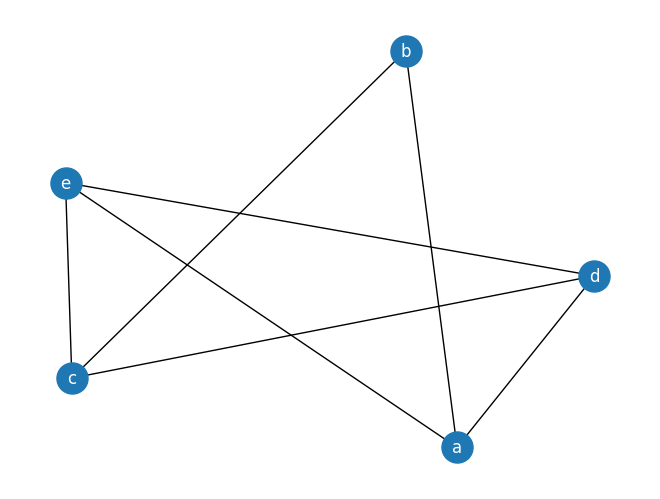

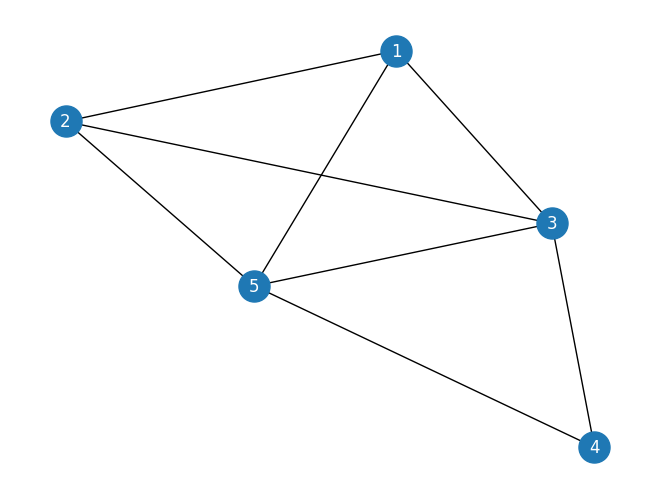

In [103]:
#  define some atom
G_1 = nx.Graph()
G_1.add_nodes_from(['a','b','c','d','e'])
G_1.add_edges_from([('a','b'),('b','c'),('c','d'),('d','a'),('a','e'),('c','e'),('d','e')])
nx.draw(G_1, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_1 = G_1.copy()
H_1.add_edge('a','c',color='r')
order = lexBFS(H_1)
G_1 = reLabel(G_1, order)
H_1 = reLabel(H_1, order)
nx.draw(H_1, with_labels=True, font_color='white', node_size=500)

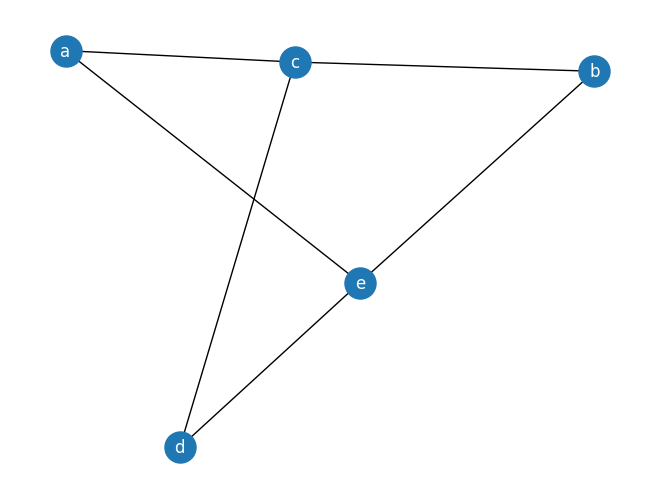

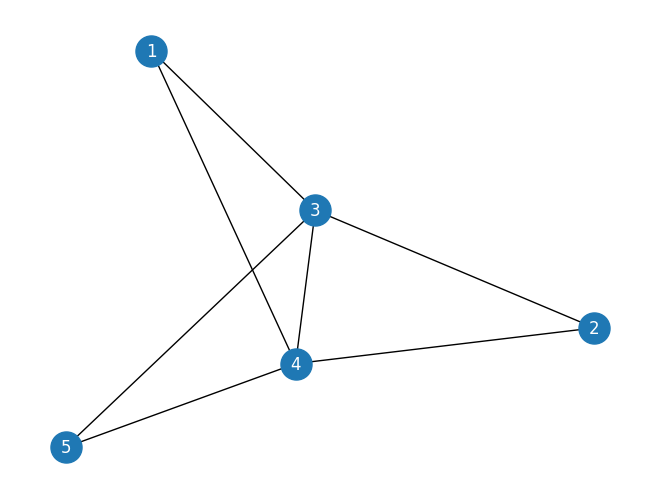

In [104]:
G_2 = nx.Graph()
G_2.add_nodes_from(['a','b','c','d','e'])
G_2.add_edges_from([('a','e'),('a','c'),('b','e'),('b','c'),('e','d'),('c','d')])
nx.draw(G_2, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_2 = G_2.copy()
H_2.add_edge('e','c',color='r')
order = lexBFS(H_2)
G_2 = reLabel(G_2, order)
H_2 = reLabel(H_2, order)
nx.draw(H_2, with_labels=True, font_color='white', node_size=500)

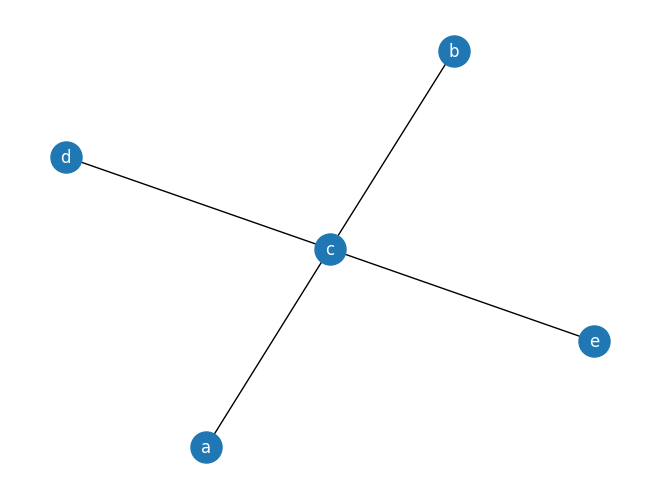

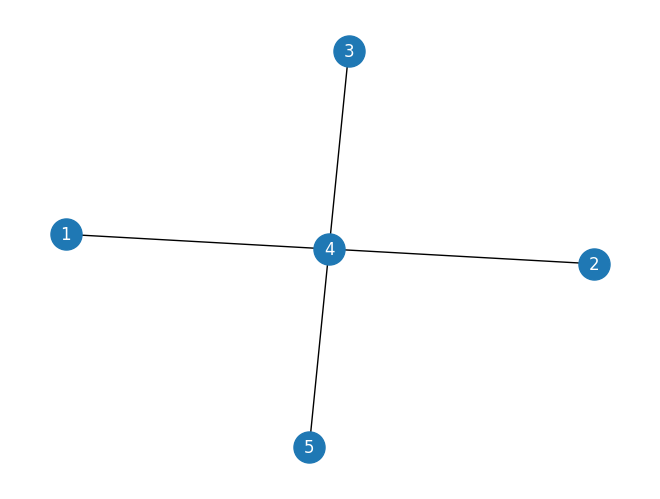

In [105]:
G_3 = nx.Graph()
G_3.add_nodes_from(['a','b','c','d','e'])
G_3.add_edges_from([('a','c'),('b','c'),('d','c'),('e','c')])
nx.draw(G_3, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_3 = G_3.copy()
H_3.add_edge('e','c',color='r')
order = lexBFS(H_3)
G_3 = reLabel(G_3, order)
H_3 = reLabel(H_3, order)
nx.draw(H_3, with_labels=True, font_color='white', node_size=500)

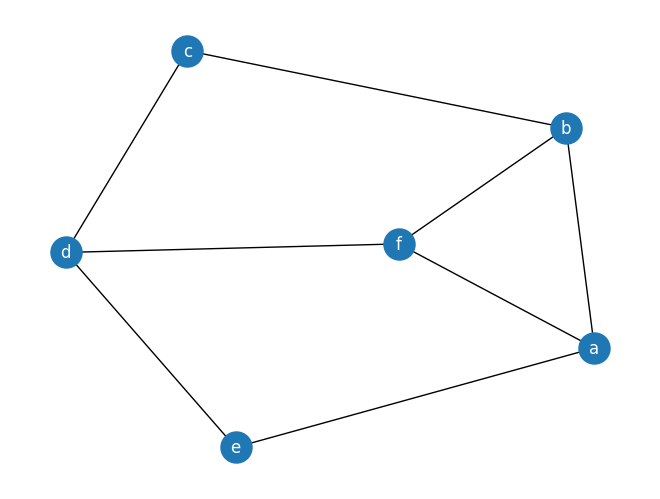

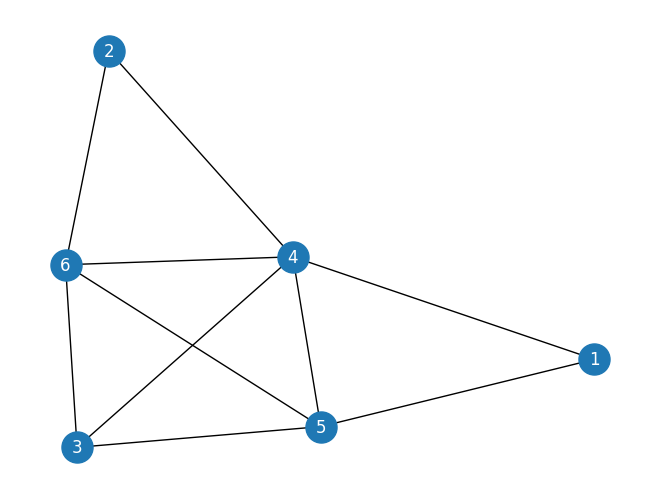

In [106]:
G_4 = nx.Graph()
G_4.add_nodes_from(['a','b','c','d','e','f'])
G_4.add_edges_from([('a','e'),('a','f'),('a','b'),('b','f'),('b','c'),('e','d'),('c','d'),('f','d')])
nx.draw(G_4, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_4 = G_4.copy()
H_4.add_edge('d','a',color='r')
H_4.add_edge('d','b',color='r')
order = lexBFS(H_4)
G_4 = reLabel(G_4, order)
H_4 = reLabel(H_4, order)
nx.draw(H_4, with_labels=True, font_color='white', node_size=500)

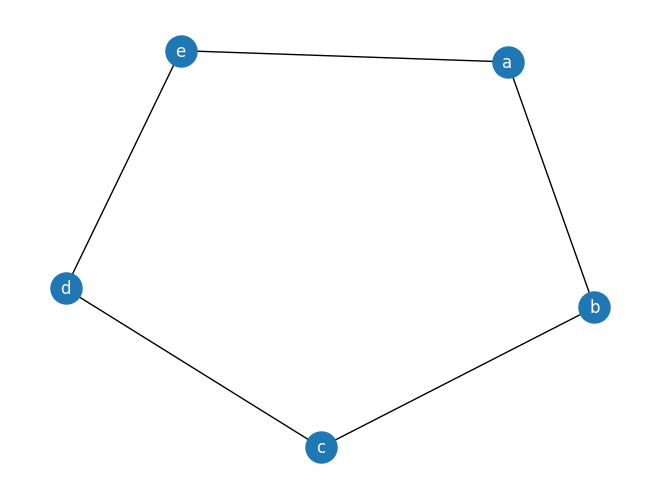

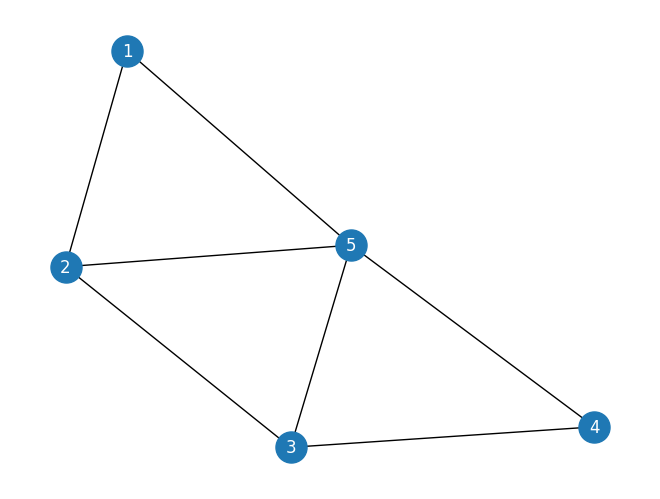

In [107]:
G_5 = nx.Graph()
G_5.add_nodes_from(['a','b','c','d','e'])
G_5.add_edges_from([('a','b'),('b','c'),('c','d'),('d','e'),('e','a')])
nx.draw(G_5, with_labels=True,font_color='white', node_size=500)
plt.figure()
H_5 = G_5.copy()
H_5.add_edge('a','c',color='r')
H_5.add_edge('a','d',color='r')
order = lexBFS(H_5)
G_5 = reLabel(G_5, order)
H_5 = reLabel(H_5, order)
nx.draw(H_5, with_labels=True, font_color='white', node_size=500)

### Save the atoms
Save as the Graph Exchange XML Format

In [108]:
path = '/Users/duanwenbo/Desktop/imperial/MSc/code/ML-for-Math/TestData/atoms'
atoms = [[G_1, H_1],[G_2, H_2], [G_3, H_3], [G_4, H_4], [G_5, H_5]]
for i, [G, H] in enumerate(atoms):
    nx.write_gexf(G, "{}/G_{}.gexf".format(path, i))
    nx.write_gexf(G, "{}/H_{}.gexf".format(path, i))

### Generating a graph (G) along with it's chordal completion (H) and the minimum-fill in ordering (\sigma)

In [109]:
import random

atoms = [[G_1, H_1],[G_2, H_2], [G_3, H_3], [G_4, H_4], [G_5, H_5]]


def unique_label(G,H):
    """
    rename the tuple to ensure the name uniqueness when composing
    """
    label_G = {node:"{}l".format(i) for i, node in enumerate(G.nodes)}
    label_H = {node:"{}r".format(i) for i, node in enumerate(H.nodes)}
    G = nx.relabel_nodes(G, label_G, copy=True)
    H = nx.relabel_nodes(H, label_H, copy=True)
    return G, H

def sync_label(G, H):
    label = {node:i for i, node in enumerate(G.nodes)}
    G = nx.relabel_nodes(G, label, copy=True)
    H = nx.relabel_nodes(H, label, copy=True)
    return G, H


def compose(G:set, H:set):
    G1, G2 = G
    H1, H2 = H
    assert len(G1.nodes) == len(H1.nodes), 'Node Number Error'
    # The compose is based on the joint with the common node label
    
    # Rename 
    G1, G2 = unique_label(G1, G2) 
    H1, H2 = unique_label(H1, H2) 

    # choose the joint
    joint_1 = random.choice(list(G1.edges))
    joint_2 = random.choice(list(G2.edges))

    # rename the joint
    rename_map_1 = {joint_1[0]:"M", joint_1[1]:"N"}
    rename_map_2 = {joint_2[0]:"M", joint_2[1]:"N"}
    G1 = nx.relabel_nodes(G1, rename_map_1, copy=True)
    G2 = nx.relabel_nodes(G2, rename_map_2, copy=True)
    H1 = nx.relabel_nodes(H1, rename_map_1, copy=True)
    H2 = nx.relabel_nodes(H2, rename_map_2, copy=True)

    G = nx.compose(G1, G2)
    H = nx.compose(H1, H2)

    G, H = sync_label(G, H)

    return G, H


def generate_min_triang(L:int, atoms:list):
    """
    Randomly generate an undirected graph and it's minimum triangulation graph

    params L: graph size
    params atoms: a list of set, each set contains a atom graph and it's minimum fill-in graph
    return G: undirected graph
           H: G's minimum triangulation graph
           minimum_order: dict format
    """
    G, H = random.choice(atoms)

    for _ in range(L):
        G_cur, H_cur = random.choice(atoms)
        G, H = compose((G, G_cur),(H, H_cur))
    minimum_order = lexBFS(H)
    return G, H, minimum_order

## Creating the dataset

In [140]:
import numpy as np
import csv
import json
from tqdm import tqdm


G_path = '/Users/duanwenbo/Desktop/imperial/MSc/code/ML-for-Math/TestData/Dataset/Graph/'
H_path = '/Users/duanwenbo/Desktop/imperial/MSc/code/ML-for-Math/TestData/Dataset/ChordalCompletion/'
order_path = '/Users/duanwenbo/Desktop/imperial/MSc/code/ML-for-Math/TestData/Dataset/MinimumOrder/'
report_path = '/Users/duanwenbo/Desktop/imperial/MSc/code/ML-for-Math/TestData/Dataset/Overview.csv'

N = 500
size_range = [50, 100]
atoms = [[G_1, H_1],[G_2, H_2], [G_3, H_3], [G_4, H_4], [G_5, H_5]]

for i in tqdm(range(N)):
    L = np.random.randint(size_range[0], size_range[1])
    G, H, minimum_order = generate_min_triang(L, atoms)
    nx.write_gexf(G, "{}G_{}.gexf".format(G_path, i))
    nx.write_gexf(G, "{}H_{}.gexf".format(H_path, i))
    with open('{}G_{}.json'.format(order_path,i),'w') as f:
        json.dump(minimum_order, f)
    m = nx.adjacency_matrix(G)
    size = m.shape[0]
    nnz = m.nnz
    with open(report_path,'a+', newline='\n') as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow(["G_{}".format(i),size,nnz,"./Graph/G_{}.gexf".format(i),
                            "./ChordalCompletion/H_{}.gexf".format(i),
                            "./MinimumOrder/G_{}.json".format(i)])
    

100%|██████████| 500/500 [01:59<00:00,  4.18it/s]
